In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-competition/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**IMPORT DATA**

In [2]:
df = pd.read_csv('../input/titanic/train.csv')

In [3]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

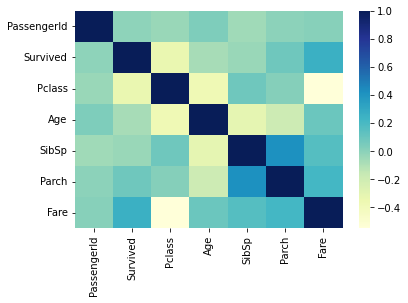

In [5]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='YlGnBu')

<AxesSubplot:>

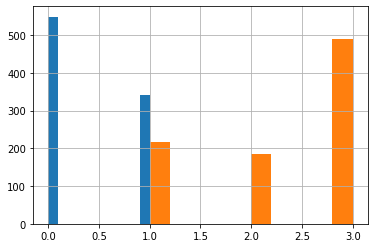

In [6]:
df['Survived'].hist()
df['Pclass'].hist()

<AxesSubplot:>

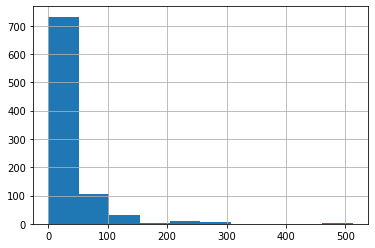

In [7]:
df['Fare'].hist()

<AxesSubplot:>

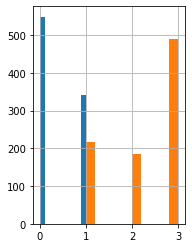

In [8]:
import matplotlib.pyplot as plt
plt.subplot(1,2,2)
df['Survived'].hist()
df['Pclass'].hist()

<AxesSubplot:>

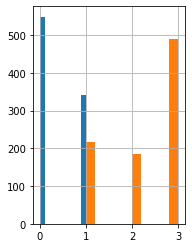

In [9]:
plt.subplot(1,2,2)
df['Survived'].hist()
df['Pclass'].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1, train_size=0.2)
for train_indices, test_indices in split.split(df,df[['Survived', 'Pclass', 'Sex']]):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]

<AxesSubplot:>

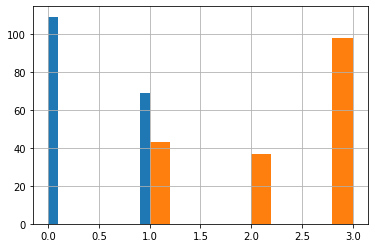

In [12]:
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

<AxesSubplot:>

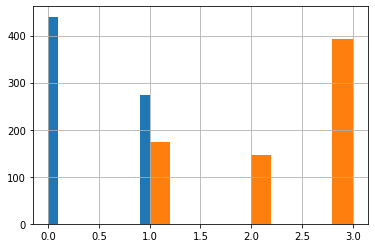

In [13]:
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

In [14]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 576 to 380
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  713 non-null    int64  
 1   Survived     713 non-null    int64  
 2   Pclass       713 non-null    int64  
 3   Name         713 non-null    object 
 4   Sex          713 non-null    object 
 5   Age          569 non-null    float64
 6   SibSp        713 non-null    int64  
 7   Parch        713 non-null    int64  
 8   Ticket       713 non-null    object 
 9   Fare         713 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     713 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.4+ KB


**FEATURE EXTRACTION**

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy = "mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [16]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ['C', 'S' , 'Q', 'N']
        
        for i in range(len(matrix.T)):
            X[column_names[i]]= matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ['Female', 'Male']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

In [17]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X , y=None):
        return self
    def transform(self, X):
        return X.drop(["Embarked", 'Name', 'Ticket', 'Cabin','Sex','N'], axis = 1, errors='ignore')

In [18]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [19]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [20]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
401,402,0,3,26.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
647,648,1,1,56.000000,0,0,35.5000,1.0,0.0,0.0,0.0,1.0
81,82,1,3,29.000000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
59,60,0,3,11.000000,5,2,46.9000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29,30,0,3,30.867241,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
175,176,0,3,18.000000,1,1,7.8542,0.0,0.0,1.0,0.0,1.0
703,704,0,3,25.000000,0,0,7.7417,0.0,1.0,0.0,0.0,1.0
501,502,0,3,21.000000,0,0,7.7500,0.0,1.0,0.0,1.0,0.0


In [21]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 887 to 277
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  178 non-null    int64  
 1   Survived     178 non-null    int64  
 2   Pclass       178 non-null    int64  
 3   Age          178 non-null    float64
 4   SibSp        178 non-null    int64  
 5   Parch        178 non-null    int64  
 6   Fare         178 non-null    float64
 7   C            178 non-null    float64
 8   S            178 non-null    float64
 9   Q            178 non-null    float64
 10  Female       178 non-null    float64
 11  Male         178 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 18.1 KB


In [22]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler= StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

**MACHINE LEARNING MODEL**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [
    {"n_estimators" : [10,100,200,500], "max_depth": [None, 5,10], "min_samples_split": [2,3,4]}
]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search .fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [24]:
final_clf = grid_search.best_estimator_

In [25]:
final_clf

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [26]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [27]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [28]:
final_clf.score(X_data_test, y_data_test)

0.7784011220196353

In [29]:
final_data = pipeline.fit_transform(df)

In [30]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [31]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [32]:
prop_clf = RandomForestClassifier()

param_grid = [
        {"n_estimators" : [10,100,200,500], "max_depth": [None, 5,10], "min_samples_split": [2,3,4]}
]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search .fit(X_data_final, y_data_final)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [33]:
prod_final_clf = grid_search.best_estimator_

In [34]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [35]:
final_test_df  = pipeline.fit_transform(df_test)

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  C            418 non-null    float64
 12  S            418 non-null    float64
 13  Q            418 non-null    float64
 14  Female       418 non-null    float64
 15  Male         418 non-null    float64
dtypes: float64(7), int64(4), object(5)
memory usage: 52.4+ KB


In [37]:
X_final_test = final_test_df
X_final_test = X_final_test.fillna(method="ffill")

X_data_final_test = scaler.fit_transform(X_final_test)

In [38]:
predictions = prod_final_clf.predict(X_data_final_test)

In [39]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
final_df = pd.DataFrame(df_test['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('/kaggle/working/predictions.csv')